In [1]:
#Libraries
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import matplotlib.pyplot as plt

In [42]:
#Load data
aed_locations=pd.read_parquet('aed_locations.parquet.gzip', engine='pyarrow')
ambulance_locations=pd.read_parquet('ambulance_locations.parquet.gzip', engine='pyarrow')
cad9=pd.read_parquet('cad9.parquet.gzip', engine='pyarrow')

interventions1=pd.read_parquet('interventions1.parquet', engine='pyarrow')
interventions2=pd.read_parquet('interventions2.parquet', engine='pyarrow')
interventions3=pd.read_parquet('interventions3.parquet', engine='pyarrow')

interventions_bxl=pd.read_parquet('interventions_bxl.parquet.gzip', engine='pyarrow')
interventions_bxl2=pd.read_parquet('interventions_bxl2.parquet.gzip', engine='pyarrow')

mug_locations=pd.read_parquet('mug_locations.parquet.gzip', engine='pyarrow')
pit_locations=pd.read_parquet('pit_locations.parquet.gzip', engine='pyarrow')

# AED locations (target?)

In [43]:
aed_locations
#Language note: non (French) or nee (Dutch) ==> No || Oui (French) or Ja (Dutch) ==> Yes

,id,type,address,number,postal_code,municipality,province,location,public,available,hours
0,13.0,None,Blvd. Fr. Roosevelt,24.0,7060.0,SOIGNIES,Hainaut,None,Y,None,None
1,70.0,None,Ch. De Wégimont,76.0,4630.0,Ayeneux,Liège,None,None,None,None
2,71.0,None,Place Saint - Lambert,NaN,4020.0,Liège,Liège,None,None,None,None
3,72.0,None,Rue du Doyard,NaN,4990.0,Lierneux,Liège,None,None,None,None
4,73.0,None,Fond Saint Servais,NaN,4000.0,Liège,Liège,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
15222,16662.0,Appareil fixe-Vast apparaat,Nekkerspoel-Borcht,19.0,2800.0,Mechelen,Antwerpen,reddersgebouw aan zwemvijver,Non-Nee,Non-Nee,None
15223,16664.0,Appareil fixe-Vast apparaat,Nieuwe Dreef,17.0,9160.0,Lokeren,Oost-Vlaanderen,Locatie : ingang poort hoofdgebouw,Oui-Ja,Oui-Ja,None
15224,16665.0,Appareil fixe-Vast apparaat,Panterschipstraat,207.0,9000.0,Gent,Oost-Vlaanderen,,Oui-Ja,Non-Nee,None
15225,16666.0,Appareil fixe-Vast apparaat,Albert Leemansplein,20.0,1050.0,Bruxelles,Bruxelles-Brussel,,Oui-Ja,Non-Nee,None


In [4]:
#How many missing values in each variable?
aed_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15227 entries, 0 to 15226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            15225 non-null  float64
 1   type          5167 non-null   object 
 2   address       15225 non-null  object 
 3   number        13085 non-null  float64
 4   postal_code   15193 non-null  float64
 5   municipality  15142 non-null  object 
 6   province      15190 non-null  object 
 7   location      8423 non-null   object 
 8   public        8079 non-null   object 
 9   available     4290 non-null   object 
 10  hours         1077 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.3+ MB


In [45]:
aed_locations_wm=aed_locations.dropna()
aed_locations_wm['number'] = aed_locations_wm['number'].astype(int).astype(str)
aed_locations_wm['postal_code'] = aed_locations_wm['postal_code'].astype(int).astype(str)
aed_locations_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 484 to 15226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            927 non-null    float64
 1   type          927 non-null    object 
 2   address       927 non-null    object 
 3   number        927 non-null    object 
 4   postal_code   927 non-null    object 
 5   municipality  927 non-null    object 
 6   province      927 non-null    object 
 7   location      927 non-null    object 
 8   public        927 non-null    object 
 9   available     927 non-null    object 
 10  hours         927 non-null    object 
dtypes: float64(1), object(10)
memory usage: 86.9+ KB


C:\Users\aleks\AppData\Local\Temp\ipykernel_18960\4085185828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aed_locations_wm['number'] = aed_locations_wm['number'].astype(int).astype(str)
C:\Users\aleks\AppData\Local\Temp\ipykernel_18960\4085185828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aed_locations_wm['postal_code'] = aed_locations_wm['postal_code'].astype(int).astype(str)


In [46]:
aed_locations_wm

,id,type,address,number,postal_code,municipality,province,location,public,available,hours
484,1079.0,Appareil fixe-Vast apparaat,Avenue Albert Ier,60,5000,Namur,Namur,Rez-de-chaussée,Oui-Ja,Non-Nee,Lundi au vendredi de 6h à 21h30
485,1080.0,Appareil fixe-Vast apparaat,Avenue Albert Ier,60,5000,Namur,Namur,Rez-de-chaussée,Oui-Ja,Non-Nee,Lundi au vendredi de 6h à 21h30
486,1081.0,Appareil fixe-Vast apparaat,Boulevard Piercot,35,4000,Liège,Liège,1er étage (ex) infirmerie,Oui-Ja,Non-Nee,lundi au vendredi de 9h à 18h
750,1412.0,Appareil fixe-Vast apparaat,Rue Ferrer,114,6000,La Hestre,Hainaut,Agence Solidaris - Rez de chaussée,Non-Nee,Non-Nee,8h00 - 17h00
1123,1881.0,Appareil fixe-Vast apparaat,Battelsesteenweg,315,2800,Mechelen,Antwerpen,nvt - mobiel AED-toestel gebruikt voor EHBO-hu...,Non-Nee,Non-Nee,nvt
...,...,...,...,...,...,...,...,...,...,...,...
15212,13572.0,Appareil fixe-Vast apparaat,QUAI DE MEUSE,1,5500,anseremme,Namur,a l acceuil du magasin,Non-Nee,Non-Nee,7h00 a 19h00
15215,16652.0,Appareil fixe-Vast apparaat,rue de Dinant,148,5570,BEAURAING,Namur,Ferme des Trois Moulins - hall d entrée - rez-...,Oui-Ja,Non-Nee,En fonction des locations
15216,16653.0,Appareil fixe-Vast apparaat,Lichtenberglaan,2095,3800,Sint-Truiden,Limburg,Gelijkvloers buiten tegen loods,Oui-Ja,Non-Nee,Tussen 8u en 16u30
15221,16661.0,Appareil fixe-Vast apparaat,Nekkerspoel-Borcht,19,2800,Mechelen,Antwerpen,"Hoofdgebouw, 1ste verdieping, thv cafetaria",Oui-Ja,Non-Nee,maandag tot en met vrijdag van 8 tot 23 uur; w...


In [26]:
#Plotting locations (Note: takes a long time!)

# Initialize Nominatim with a user agent
geolocator = Nominatim(user_agent="my_geocoder", timeout=30)

# Iterate through rows and create markers only for valid addresses
markers = []
for _, row in aed_locations_wm.iterrows():
    address = f"{row['address']} {row['number']}, {row['postal_code']} {row['municipality']}"
    
    # Check if all address components are available
    if all(value for value in address.split(",")):
        location = geolocator.geocode(address)
        if location:
            marker = folium.Marker([location.latitude, location.longitude], popup=address)
            markers.append(marker)

# Create the initial map and add all valid markers
mymap = folium.Map()
for marker in markers:
    marker.add_to(mymap)

# Set zoom level based on number of markers
zoom_start = 12 if len(markers) > 1 else 15
mymap.fit_bounds([marker.location for marker in markers])
mymap.zoom_start = zoom_start

# Display the map
display(mymap)


In [47]:
#print(aed_locations_wm['public'].unique()) 
#Replace ja with Oui-Ja (consistency)
aed_locations_wm['public'] = aed_locations_wm['public'].replace('Ja', 'Oui-Ja')

C:\Users\aleks\AppData\Local\Temp\ipykernel_18960\1845171886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aed_locations_wm['public'] = aed_locations_wm['public'].replace('Ja', 'Oui-Ja')


In [48]:
aed_locations_wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 484 to 15226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            927 non-null    float64
 1   type          927 non-null    object 
 2   address       927 non-null    object 
 3   number        927 non-null    object 
 4   postal_code   927 non-null    object 
 5   municipality  927 non-null    object 
 6   province      927 non-null    object 
 7   location      927 non-null    object 
 8   public        927 non-null    object 
 9   available     927 non-null    object 
 10  hours         927 non-null    object 
dtypes: float64(1), object(10)
memory usage: 86.9+ KB


In [49]:
print(aed_locations_wm['public'].unique()) 
print(aed_locations_wm['available'].unique()) 

['Oui-Ja' 'Non-Nee']
['Non-Nee' 'kantooruren' 'Pendant heures d ouverture du site' 'Oui-Ja'
 'tijdens de openingsuren' 'tijdens onze openingsuren, zie nr. 12'
 'tijdens de kantooruren' 'tijdens de kantooruren in de week'
 'Tijdens de kantooruren' 'Ja' 'tijdens openinguren sportcentrum'
 '09u-12u en op aanvraag' 'horaire d ouverture de la pharmacie'
 'de 5h00 à 25h00' '5h00 à 25h00' 'Pendant les heures de cours'
 '9.00 - 17.00' '09.00 - 17.00' 'Heures de bureau ' 'Heures de bureau'
 'tijdens werkuren' 'oui via interphone'
 'Accessible par toute personne présente dans l inrfastructure.'
 'tijdens de werkuren' 'Tijdens openingsuren van het museum'
 'De 5h30 à 21h30' 'du lundi au vendredi ']


In [20]:
print(aed_locations_wm['location'].unique()) #text file!

['Rez-de-chaussée' '1er étage (ex) infirmerie '
 'Agence Solidaris - Rez de chaussée'
 'nvt - mobiel AED-toestel gebruikt voor EHBO-hulpposten'
 'Hall au rez face au bureau d accueil'
 'A la cafétariat de la salle de Judo'
 'Intérieur\xa0: Milieu du foyer (près du bar)\n'
 'Hall d entrée du bâtiment "Vestiaires" du stade de football du Risquons-Tout'
 'Intérieur\xa0: Couloir menant aux vestiaires du bas (plaine de Neckere)'
 'Intérieur\xa0: Local d’accueil, bâtiment sous le nouveau bâtiment à deux étages\n'
 'Maison de Quartier'
 'Dans l école, à proximité de la salle de gymnastique'
 'Dans l école, dans le sas d entrée vers la salle de gymnastique'
 'Rez-de-chaussée, accès par l entrée "Services finances" ou via la salle de l Orangerie, adjacente à la salle Jacques Gallant'
 'Kantine voetbal ' 'Cercle Ouvrier\n1er étage à gauche' 'Hall d entrée'
 'zwembad - redderslokaal' 'Hoofdkantoor - hall'
 'A l entrée du Skate Parc site Derlys '
 'Deze machine is verplaatst. Eerst hing deze in de

In [31]:
print(aed_locations_wm['municipality'].unique()) 

['Namur' 'Liège' 'Hainaut' 'Antwerpen' 'Bruxelles-Brussel'
 'Brabant Wallon' 'Oost-Vlaanderen' 'Limburg' 'Vlaams-Brabant'
 'West-Vlaanderen' 'Luxembourg']


In [50]:
# Capitalize the first letter in each value
aed_locations_wm['municipality'] = aed_locations_wm['municipality'].str.title()


C:\Users\aleks\AppData\Local\Temp\ipykernel_18960\208781924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aed_locations_wm['municipality'] = aed_locations_wm['municipality'].str.title()


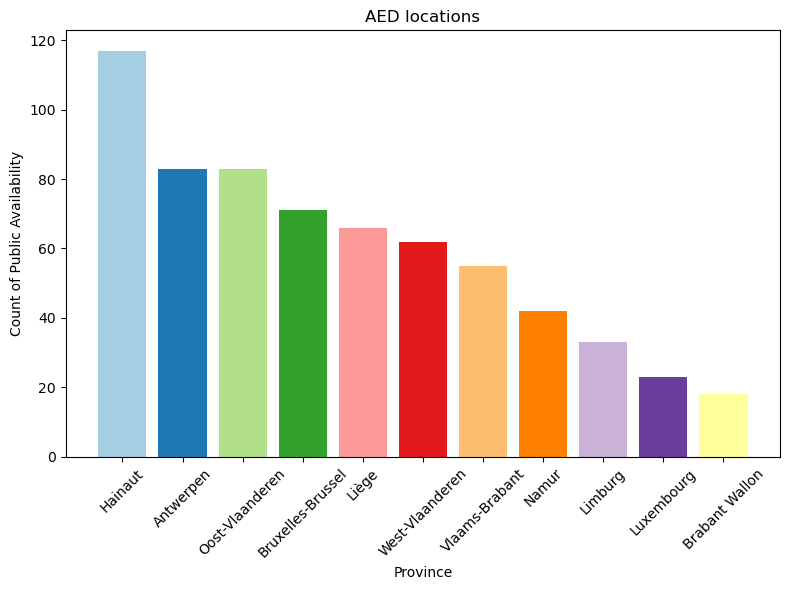

In [60]:
import pandas as pd


df = aed_locations_wm

# Filter public institutions (replace with your actual values)
public_df = df[df["public"] == "Oui-Ja"]

# Group by province and count public institutions
province_counts = public_df["province"].value_counts()

# Define custom colors for bars
colors = plt.cm.Paired(range(len(province_counts)))

# Create the main histogram
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(province_counts.index, province_counts.values, color=colors)
plt.xlabel("Province")
plt.ylabel("Count of Public Availability")
plt.title("AED locations")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the histogram
plt.tight_layout()
plt.show()


# Ambulance_locations

In [61]:
ambulance_locations

,base,medical_resource,province,region,departure_location,departure_location_number,latitude,longitude,occasional_permanence
0,BA ANTW [Borgerhout] AMBUCE,ZW ANTWERPEN 7 (Team: AAANTW07A),Antwerpen,Vlaams Gewest,Gijselstraat 150 2140 BORGERHOUT,3811,51.215516,4.443788,N
1,BA ANTW [Hoboken] AMBUCE,ZW ANTWERPEN 9 (Team: AAANTW09A),Antwerpen,Vlaams Gewest,Antwerpsesteenweg 242 2660 HOBOKEN,3812,51.178831,4.361948,N
2,BA ANTW [Hof Ter Schelde] AC Antwerpen,ZW ANTWERPEN 3 (Team: AAANTW03A),Antwerpen,Vlaams Gewest,August Vermeylenlaan 6 2050 ANTWERPEN,10902,51.232810,4.377237,N
3,BA ANTW [Kaai 606] SIHWA,ZW ANTWERPEN HAVEN 1 (Team: AAAPOR01A)_x000D_Z...,Antwerpen,Vlaams Gewest,Antwerpsebaan 4 (Kaai 606) 2040 ANTWERPEN,12902,51.315516,4.321506,N
4,BA ANTW [Sint Elisabeth] AC Antwerpen,ZW ANTWERPEN 2 (Team: AAANTW02A),Antwerpen,Vlaams Gewest,Leopoldstraat 26 2000 ANTWERPEN,10901,51.213623,4.405718,N
...,...,...,...,...,...,...,...,...,...
274,FX PDS SHUB Luxembourg,ZS.STHUBERT 1 (Team: AXSHUB01A)_x000D_ZS.STHUB...,Luxemburg,Waals Gewest,Route De Poix 23 6870 SAINT-HUBERT,80003,50.025633,5.359641,Y
275,HG UR HERS Andre Renard,AMB OCC HERSTAL (Team: AGTIHARE1),Luik,Waals Gewest,Rue André Renard 1 4040 HERSTAL,63601,50.674803,5.633665,Y
276,HG UR LIEG CHR Citadelle,AMB LIEGE CHR (Team: AGLIEG09A)_x000D_AMB OCC ...,Luik,Waals Gewest,Allée De L'Absent 1 4000 LIEGE,67201,50.652888,5.578356,Y
277,HG UR LIEG CHU Notre Dame Bruyeres,(Team: AGTIHCHU1),Luik,Waals Gewest,Rue de Gaillarmont 600 4030 LIEGE,63602,50.622523,5.636381,Y


In [62]:
ambulance_locations.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       279 non-null    object 
 1   medical_resource           279 non-null    object 
 2   province                   266 non-null    object 
 3   region                     279 non-null    object 
 4   departure_location         279 non-null    object 
 5   departure_location_number  279 non-null    int64  
 6   latitude                   279 non-null    float64
 7   longitude                  279 non-null    float64
 8   occasional_permanence      279 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 19.7+ KB


In [67]:
print(ambulance_locations['province'].unique()) 

['Antwerpen' None 'Waals-Brabant' 'Luik' 'Henegouwen' 'Limburg' 'Namen'
 'Oost-Vlaanderen' 'Vlaams-Brabant' 'West-Vlaanderen' 'Luxemburg']


In [69]:
#Missing values in province are all located in Bruxelles-Brussel!

# Select rows with missing values in 'province'
missing_province_df = ambulance_locations[ambulance_locations['province'].isnull()]
missing_province_df


,base,medical_resource,province,region,departure_location,departure_location_number,latitude,longitude,occasional_permanence
15,BB BRUX Hôpital Militair KA,AMB COVID HM (Team: ABBRUX22A)_x000D_AMB HMB 1...,None,Brussels Hoofdstedelijk Gewest,Rue Bruyn 1 1120 NEDER-OVER-HEEMBEEK,3921,50.907259,4.392329,N
16,BB FORE Croix Rouge,AMB FOREST (Team: ABFORE01A),None,Brussels Hoofdstedelijk Gewest,Rue Marconi 144 1190 FOREST,3423,50.815526,4.341663,N
65,FB PDS ANDE [PASI Anderlecht] SIAMU,AMB AND 1 (Team: ABANDE01A)_x000D_AMB AND 2 (T...,None,Brussels Hoofdstedelijk Gewest,Chaussée De Mons 627 1070 ANDERLECHT,24107,50.832487,4.311568,N
66,FB PDS BRUX [PASI Cité] SIAMU,AMB CITE 10 (Team: ABBRUX10A)_x000D_AMB CITE 1...,None,Brussels Hoofdstedelijk Gewest,Rue Vésale 1000 BRUXELLES,24113,50.850885,4.364329,N
67,FB PDS IXEL [PASI Delta] SIAMU,AMB DELTA 1 (Team: ABIXEL01A)_x000D_AMB DELTA ...,None,Brussels Hoofdstedelijk Gewest,Boulevard Du Triomphe 155 1050 IXELLES,24104,50.818885,4.402860,N
68,FB PDS SCHA [PASI Paul Brien] SIAMU,AMB BRIEN 1 (Team: ABSCHA01A)_x000D_AMB BRIEN ...,None,Brussels Hoofdstedelijk Gewest,Avenue Brietsiers 11B 1030 SCHAERBEECK,24110,50.867478,4.377335,N
69,FB PDS UCCL [PASI Chênai] SIAMU,AMB CHENAIE (Team: ABUCCL01A),None,Brussels Hoofdstedelijk Gewest,Avenue De La Chênaie 161C 1180 UCCLE,24108,50.783234,4.355925,N
222,HB UR BRUX CHU St Pierre,AMB HSP 14 (Team: ABBRUX14A)_x000D_AMB HSP 6 (...,None,Brussels Hoofdstedelijk Gewest,Rue Haute 290 1000 BRUXELLES,24102,50.835718,4.347563,N
223,HB UR BRUX CU St Luc,AMB COVID UCL (Team: ABBRUX15A)_x000D_AMB UCL ...,None,Brussels Hoofdstedelijk Gewest,Avenue Hyppocrate 92 1200 WOLUWE,24105,50.851900,4.460354,N
224,HB UR BRUX Europe Elisabeth,AMB ST ELISABETH 9 (Team: ABBRUX09A),None,Brussels Hoofdstedelijk Gewest,Avenue De Fré 206 1180 BRUXELLES,24106,50.805155,4.368545,N


In [71]:
#Adjust Bruxelles-Brussel everywhere
ambulance_locations['province'].fillna("Bruxelles-Brussel", inplace=True)
ambulance_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       279 non-null    object 
 1   medical_resource           279 non-null    object 
 2   province                   279 non-null    object 
 3   region                     279 non-null    object 
 4   departure_location         279 non-null    object 
 5   departure_location_number  279 non-null    int64  
 6   latitude                   279 non-null    float64
 7   longitude                  279 non-null    float64
 8   occasional_permanence      279 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 19.7+ KB


In [78]:
#Plotting locations (Note: takes a long time!)

# Initialize Nominatim with a user agent
geolocator = Nominatim(user_agent="my_geocoder", timeout=30)

# Iterate through rows and create markers only for valid addresses
markers = [
    folium.Marker(location=[row["latitude"], row["longitude"]])
    for index, row in ambulance_locations.iterrows()
]

# Create the initial map and add all valid markers
mymap = folium.Map()
for marker in markers:
    marker.add_to(mymap)

# Set zoom level based on number of markers
zoom_start = 12 if len(markers) > 1 else 15
mymap.fit_bounds([marker.location for marker in markers])
mymap.zoom_start = zoom_start

# Display the map
display(mymap)


# cad9

In [80]:
cad9

,province,Mission ID,Service Name,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,Vector Type,EventType Trip,EventSubType Trip,...,Name destination hospital,Intervention time (T1Reported),Intervention time (T1Confirmed),Departure time (T1Reported),Departure time (T1Confirmed),UI,ID,MISSION_NR,AMBUCODE,UNIT_ID
0,VBR,21221520003,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,P034 - SCHEDELTRAUMA,/,...,HV UR VILV AZ JAN PORTAELS,10.0,NaN,2.0,NaN,21221520003 1969661672,19189868,21221520003,240.0,MVVILV101
1,VBR,21221520004,MV HVP HALL West,50.743200,4.241053,AVHALL02A,ZW HALLE 2,Ambulance,P010 - ADEMHALINGSMOEILIJKHEDEN,/,...,HV UR HALL AZ ST MARIA,7.0,NaN,3.0,NaN,21221520004 1969661709,19189847,21221520004,240.0,MVHALL102
2,VBR,21221520007,MV HVP VILV West,50.925277,4.423057,AVVILV01A,ZW VILVOORDE 1,Ambulance,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,HV UR VILV AZ JAN PORTAELS,10.0,NaN,4.0,NaN,21221520007 1969664866,19190011,21221520007,240.0,MVVILV101
3,VBR,21221520007,HV UR VILV AZ Jan Portaels,50.926869,4.420968,UVVILV01A,MUG VILVOORDE,MUG,Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH,/,...,HV UR VILV AZ JAN PORTAELS,7.0,NaN,1.0,NaN,21221520007 1969665019,19190053,21221520007,0.0,MVVILV301
4,VBR,21221520008,BB BRUX Hôpital Militair KA,50.905331,4.387662,ABBRUX13A,AMB HMB 13,Ambulance,P020 - INTOXICATIE ALCOHOL,/,...,None,14.0,NaN,7.0,NaN,21221520008 1969665449,19189967,21221520008,39.0,MBMILH101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289396,NAM,90221870001,BF SART BHN AMBU,NaN,NaN,AFSART02A,AMB SART-DAME-AVELINES 2,Ambulance,PERSONNES en danger / dans le besoin,/,...,None,0.0,NaN,NaN,NaN,90221870001 1972752051,19401306,90221870001,246.0,MFPRMA102
289397,NAM,90221870002,MF PDS BRAL Brabant Wallon,50.686351,4.395892,AFBRAL03A,AMB BRAINE-L'ALLEUD 3,Ambulance,PERSONNES en danger / dans le besoin,/,...,None,0.0,NaN,NaN,NaN,90221870002 1972753708,19401456,90221870002,200.0,MFSIBR103
289398,NAM,90221870003,MF PDS WAVR Brabant Wallon,50.698985,4.615385,AFWAVR01A,AMB WAVRE 1,Ambulance,PERSONNES en danger / dans le besoin,/,...,None,0.0,NaN,NaN,NaN,90221870003 1972754402,19401519,90221870003,200.0,MFSIWA101
289399,NAM,90221880001,BF SART BHN AMBU,NaN,NaN,AFSART01A,AMB SART-DAME-AVELINES 1,Ambulance,PERSONNES en danger / dans le besoin,/,...,None,0.0,NaN,NaN,NaN,90221880001 1972817859,19404988,90221880001,246.0,MFPRMA101


In [81]:
cad9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289401 entries, 0 to 289400
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   province                         289401 non-null  object 
 1   Mission ID                       289401 non-null  int64  
 2   Service Name                     196821 non-null  object 
 3   Latitude permanence              233726 non-null  float64
 4   Longitude permanence             233726 non-null  float64
 5   Permanence short name            289204 non-null  object 
 6   Permanence long name             196821 non-null  object 
 7   Vector Type                      289401 non-null  object 
 8   EventType Trip                   289343 non-null  object 
 9   EventSubType Trip                289401 non-null  object 
 10  EventLevel Trip                  289331 non-null  object 
 11  CityName intervention            289277 non-null  object 
 12  Ci

In [104]:
#Text file: code for each intervention: for cardiac arrest 
#(code: P039 (cardiac arrest (no pain on chest)), P011(pain chest), P008(PATIENT WITH DEFIBRILLATOR OR PACEMAKER)) 
print(cad9['EventType Trip'].unique()) 

['P034 - SCHEDELTRAUMA' 'P010 - ADEMHALINGSMOEILIJKHEDEN'
 'Y_TI BEVRIJDING PERSOON BEKLEMD/OPGESLOTEN+DGH'
 'P020 - INTOXICATIE ALCOHOL' 'P075 - ONCOLOGISCHE PATIËNT IN BEHANDELING'
 'P039 - CARDIAAL PROBLEEM (NIET PIJN OP DE BORST)'
 'P011 - PIJN OP DE BORST' 'P016 - ZWANGERSCHAP-BEVALLING'
 'P068 - UROGENITAAL PROBLEEM' 'P026 - ONWEL/ZIEK ZONDER DUIDELIJKE FOCUS'
 'P033 - TRAUMA' 'P031 - PSYCHIATRISCH PROBLEEM'
 'P009 - SUIKERZIEKTE - DIABETES' 'P013 - NIET-TRAUMATISCHE RUGPIJN'
 'P001 - VERKEERSONGEVAL' 'P080 - COVID-19' 'P015 - EPILEPSIE - STUIPEN'
 'P059 - DUIZELIGHEID - ONPASSELIJK' 'P019 - BEWUSTELOOS - COMA - SYNCOPE'
 'P012 - NIET-TRAUMATISCHE BUIKLAST' 'P099 - INTERHOSPITAALTRANSPORT'
 'P004 - CVA-TIA' 'P007 - VAL VAN GROTE HOOGTE (>3 METER)'
 'P032 - ALLERGISCHE REACTIE'
 'P061 - LIDMAAT/BEWEGINGSSTELSEL NIET TRAUMA' 'P005 - WONDE DOOR WAPEN'
 'P066 - POSTOP PROBLEEM' 'P022 - INTOXICATIE MEDICATIE'
 'P067 - SOCIAAL PROBLEEM' 'P017 - NIET-TRAUMATISCH BLOEDVERLIES'
 'P035 - K

In [114]:
cad9['EventType Trip'].value_counts()

P033 - TRAUMA                          47929
P010 - ADEMHALINGSMOEILIJKHEDEN        24225
P019 - BEWUSTELOOS - COMA - SYNCOPE    21232
P011 - PIJN OP DE BORST                14210
P012 - NIET-TRAUMATISCHE BUIKLAST      13059
                                       ...  
PERSONEN Noodsituatie                      1
Z_BR BRAND VOERTUIG                        1
Y_GS EXPLOSIE RISICO+DGH                   1
Y_SI SCHEEPVAARTONGEVAL+DGH                1
Y_GS ALGEMEEN+DGH                          1
Name: EventType Trip, Length: 130, dtype: int64

In [117]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(cad9['EventType Trip'], prefix='EvenType')

# Concatenate the one-hot encoded columns to the original DataFrame
df_encoded = pd.concat([cad9, one_hot_encoded], axis=1)

# Interventions 1

In [120]:
interventions1

,Mission ID,Service Name,PostalCode permanence,CityName permanence,StreetName permanence,HouseNumber permanence,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,...,Unavailable time,Name destination hospital,PostalCode destination hospital,CityName destination hospital,StreetName destination hospital,HouseNumber destination hospital,Calculated travelTime destinatio,Calculated Distance destination,Number of transported persons,Abandon reason
0,10221520001,HA UR MECH AZ St Maarten,2800.0,Mechelen (Mechelen),Liersesteenweg,None,51.051020,4.478030,AAMECH01A,ZW MECHELEN 1,...,NaN,None,None,None,None,None,NaN,NaN,NaN,Verzorgd ter plaatse
1,10221520002,BA KAPE AMBUCE,2950.0,Kapellen (Kapellen),Essenhoutstraat,None,51.312075,4.424398,AAKAPE01A,ZW KAPELLEN 1,...,NaN,HA UR ANTW Jan Palfijn,None,Antwerpen (Merksem),Lange Bremstraat,None,678.0,11743.0,1.0,None
2,10221520002,HA UR ANTW Stuivenberg,2060.0,Antwerpen (Antwerpen),Lange Beeldekensstraat,None,51.222490,4.436290,UAANTW01A,MUG ANTWERPEN 1,...,NaN,None,None,None,None,None,NaN,NaN,NaN,None
3,10221520004,BA ANTW [Borgerhout] AMBUCE,2140.0,Antwerpen (Borgerhout),Gijselsstraat,None,51.215620,4.443920,AAANTW07A,ZW ANTWERPEN 7,...,NaN,None,None,None,None,None,NaN,NaN,NaN,Zonder patient
4,10221520005,BA WIJN AMBUCE,2110.0,Wijnegem (Wijnegem),Bijkhoevelaan,None,51.233550,4.493180,AAWIJN01A,ZW WIJNEGEM 1,...,NaN,HA UR ANTW Jan Palfijn,None,Antwerpen (Merksem),Lange Bremstraat,None,530.0,5468.0,1.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200622,50221920082,FH PDS BEAU Hainaut Est,6500.0,Beaumont (Beaumont),Chauss√©e de Mons,None,50.241870,4.234680,AHBEAU01A,ZS BEAUMONT 1,...,NaN,HH UR MONI CHU Andre Vesale,None,Montigny-le-Tilleul,Rue de Goz√©e,None,NaN,NaN,1.0,None
200623,50221920083,BH LOUV AS Grande,7110.0,La Louvi√®re (Str√©py-Bracquegnies),Rue de Nivelles,None,50.469758,4.128008,AHLOUV03A,AMB STREPY 1,...,NaN,HH UR LOUV CHU Tivoli,None,La Louvi√®re (La Louvi√®re),Avenue Max Buset,None,NaN,NaN,1.0,None
200624,50221920084,BH GERP SAPG Poste Loverval,6280.0,Gerpinnes (Loverval),Chauss√©e de Philippeville,None,50.373360,4.467450,AHGERP01A,AMB LOVERVAL 1,...,NaN,HH EX LOVE IMTR Brul√©s,None,Gerpinnes (Loverval),Rue de Villers,None,NaN,NaN,1.0,None
200625,50221920085,FH PDS BINC Hainaut Centre,7130.0,Binche (Binche),Rue de la P√©pini√®re,57A,50.415230,NaN,AHBINC01A,ZS BINCHE 1,...,NaN,HH UR LOUV CHU Jolimont,None,La Louvi√®re (Haine-Saint-Paul),Rue Ferrer,None,NaN,NaN,1.0,None


In [121]:
interventions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200627 entries, 0 to 200626
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Mission ID                        200627 non-null  int64  
 1   Service Name                      200493 non-null  object 
 2   PostalCode permanence             200266 non-null  float64
 3   CityName permanence               200265 non-null  object 
 4   StreetName permanence             200492 non-null  object 
 5   HouseNumber permanence            8433 non-null    object 
 6   Latitude permanence               169009 non-null  float64
 7   Longitude permanence              198104 non-null  float64
 8   Permanence short name             200619 non-null  object 
 9   Permanence long name              200619 non-null  object 
 10  Vector type                       200627 non-null  object 
 11  EventType Firstcall               200626 non-null  o

In [123]:
# P039 - Cardiac problem (other than thoracic pain)
# P003 - Cardiac arrest
# P008 - Patient with defibrillator - pacemaker
print(interventions1['EventType Firstcall'].unique()) 

['P020 - Intoxication alcohol' 'P068 - Urogenital problem' 'P033 - Trauma'
 'P022 - Intoxication medication' 'P026 - Unclear problem'
 'P031 - Psychiatric problem'
 'P065 - Sudden deafness or ringing in the ears' 'P009 - Diabetes'
 'FI (1.3.0) fire building' 'P030 - Hanging and strangulation'
 'P011 - Chest pain' 'P012 - Non-traumatic abdominal pain'
 'P010 - Respiratory problems' 'P099 - Interhospital transport'
 'P017 - Non-traumatic bleeding'
 'P071 - Sick child < 15 years with abdominal pain'
 'P096 - Out of service'
 'P039 - Cardiac problem (other than thoracic pain)'
 'P019 - Unconscious - syncope' 'P003 - Cardiac arrest'
 'P001 - Traffic accident'
 'P023 - Intoxication (household, agricultural, industrial)'
 'P015 - Epilepsy - convulsions' 'P013 - Non-traumatic back pain'
 'P004 - Stroke' 'P034 - Skull trauma' 'P005 - Wounded by weapon'
 'P066 - Post-operative problem' 'P059 - Dizziness - Nausea'
 'P061 - Limb hot or cold' 'P007 - Fall from great height (> 3 meters)'
 'P035 - Co

[  nan  678.  530. ... 1810. 1592. 2284.]


In [125]:
mug_locations

,hospital_id,mug_id,campus_id,name_hospital,name_campus,address_campus,postal_code,municipality,region,province
0,9,102000,6230,ZIEKENHUISNETWERK ANTWERPEN (ZNA),ZNA CADIX,KEMPENSTRAAT 100,2030,ANTWERPEN,V,Antwerpen
1,99,102000,2020,GZA- ZIEKENHUIZEN,SINT-VINCENTIUS,ST.-VINCENTIUSSTRAAT 20,2018,ANTWERPEN,V,Antwerpen
2,682,102000,1210,AZ MONICA,DEURNE,FLORENT PAUWELSLEI 1,2100,DEURNE,V,Antwerpen
3,9,103000,2000,ZIEKENHUISNETWERK ANTWERPEN (ZNA),ZNA MIDDELHEIM,LINDENDREEF 1,2020,ANTWERPEN,V,Antwerpen
4,99,103000,1290,GZA- ZIEKENHUIZEN,SINT- AUGUSTINUS,OOSTERVELDLAAN 24,2610,WILRIJK,V,Antwerpen
...,...,...,...,...,...,...,...,...,...,...
89,20,808000,3010,CHR VERVIERS - EAST BELGIUM,LA TOURELLE,RUE DU PARC 29,4800,VERVIERS,W,Luik
90,168,901000,3720,VIVALIA,HOPITAL DE BASTOGNE,RUE DE HOUFFALIZE 1,6600,BASTOGNE,W,Luxemburg
91,246,902000,3690,VIVALIA,HOPITAL D'ARLON,RUE DES DEPORTES 137,6700,ARLON,W,Luxemburg
92,168,903000,3240,VIVALIA,HOPITAL DE LIBRAMONT,AVENUE DE HOUFFALIZE 35,6800,LIBRAMONT,W,Luxemburg


In [126]:
pit_locations

,unit,campus,province,region,unit_id,ambucode,ambusitecode,link
0,"100001: PIT Rumst, AZ Rivierland",Ziekenhuis/Hôpital: 104 - AZ RIVIERENLAND --- ...,Antwerpen/Anvers,Vlaanderen/Flandre,PARUMS01A,191,19101,None
1,"102001: PIT Deinze, St Vincentius",Ziekenhuis/Hôpital: 134 - AZ SINT-VINCENTIUS -...,Oost-Vlaanderen/Flandre orientale,Vlaanderen/Flandre,PODEIN01A,413,41301,None
2,102101: PIT Stuivenberg,Ziekenhuis/Hôpital: 009 - ZIEKENHUISNETWERK AN...,Antwerpen/Anvers,Vlaanderen/Flandre,PAANTW01A,117,11704,None
3,"110001: PIT Lier, Heilig Hart",Ziekenhuis/Hôpital: 097 - HEILIG HART ZIEKENHU...,Antwerpen/Anvers,Vlaanderen/Flandre,PALIER01A,171,17101,None
4,113001: PIT HEILIG HART ZIEKENHUIS,Ziekenhuis/Hôpital: 102 - HEILIG HART ZIEKENHU...,Antwerpen/Anvers,Vlaanderen/Flandre,PAMOL_01A,190,19001,None
5,200001: PIT LOKEREN,Ziekenhuis/Hôpital: 595 - VITAZ --- Campus/Sit...,Oost-Vlaanderen/Flandre orientale,Vlaanderen/Flandre,POLOKE01A,440,44001,None
6,"210001: PIT ASSE, OLV",Ziekenhuis/Hôpital: 126 - ONZE-LIEVE-VROUW ZIE...,Vlaams Brabant/Brabant flamand,Vlaanderen/Flandre,PVASSE01A,480,48001,None
7,301001: PIT ST Jan (Associatie St Lucas),Ziekenhuis/Hôpital: 049 - AZ SINT-JAN BRUGGE -...,West-Vlaanderen/Flandre occidentale,Vlaanderen/Flandre,PWBRUG01A,391,39102,PIT 301001 gelinkt aan de ziekenhuizen/lié aux...
8,301001: PIT St Lucas Brugge (associatie St Jan),Ziekenhuis/Hôpital: 140 - AZ SINT-LUCAS --- Ca...,West-Vlaanderen/Flandre occidentale,Vlaanderen/Flandre,PWBRUG02A,391,39101,PIT 301001 gelinkt aan de ziekenhuizen/lié aux...
9,303001: PIT Blankenberge,Ziekenhuis/Hôpital: 392 - AZ ZENO --- Campus/S...,West-Vlaanderen/Flandre occidentale,Vlaanderen/Flandre,PWBLAN01A,374,37401,None
